In [1]:
import pandas as pd
import numpy as np

In [2]:
main = pd.read_csv("MainData.csv")
validate = pd.read_csv("ValidationFinal.csv")

In [3]:
main.result.value_counts()

0    4078
1    3962
Name: result, dtype: int64

In [4]:
main

,Unnamed: 0,text,result,cleanedText
0,0,"Introverts, how did you get a girlfriend?",0,introverted girlfriend
1,1,1m older people say they often feel lonely. Re...,1,older people feel lonely regular physical acti...
2,2,@staceeeeee goodnight Cuppycake hope you have...,0,staceeeeee goodnight cupcake hope good day don...
3,3,wanting to die but not having the ability to k...,1,wanting die having ability kill urselfcan rela...
4,4,"Hey guys,\nI was diagnosed with Atypical depre...",1,hey guys diagnosed atypical depression panic f...
...,...,...,...,...
8035,8035,Where is @JohnMu? anyone heard or have seen Jo...,0,johnmu heard seen john cheeseland recently
8036,8036,I took the rest of my sleeping pills and my pa...,1,took rest sleeping pills painkillers cant wait...
8037,8037,"@PreDivorcePower More like outer circle, not i...",0,predivorcepower like outer circle inner circle...
8038,8038,hooray! i have 3 stalkers! spy me spy me!!! w...,0,hooray 3 stalkers spy spy find ok win round hi...


In [5]:
main = main.dropna()
from tensorflow.keras.preprocessing.text import Tokenizer
MAX_NB_WORDS = 50000
MAX_SEQUENCE_LENGTH = 250
EMBEDDING_DIM = 100
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(main['cleanedText'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 22272 unique tokens.


In [6]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
X = tokenizer.texts_to_sequences(main['cleanedText'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (8033, 250)


In [7]:
Y = pd.get_dummies(main['result']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (8033, 2)


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.25, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(6024, 250) (6024, 2)
(2009, 250) (2009, 2)


In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, SpatialDropout1D, LSTM, Dense,GRU, Dropout
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(LSTM(125, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy',
                                                                         tf.keras.metrics.Precision(name='precision'),
                                                                         tf.keras.metrics.Recall(name='recall'),
                                                                         tf.keras.metrics.RootMeanSquaredError(name = 'rmse'),
                                                                         tf.keras.metrics.TrueNegatives(name='TN'),
                                                                         tf.keras.metrics.TruePositives(name='TP'),
                                                                         tf.keras.metrics.FalseNegatives(name='FN'),
                                                                         tf.keras.metrics.FalsePositives(name='FP'),
                                                                         'mse'])
epochs = 7
batch_size = 256
history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/7
22/22 [==============================] - 59s 2s/step - loss: 0.5759 - accuracy: 0.7309 - precision: 0.7309 - recall: 0.7309 - rmse: 0.4427 - TN: 3962.0000 - TP: 3962.0000 - FN: 1459.0000 - FP: 1459.0000 - mse: 0.1960 - val_loss: 0.4459 - val_accuracy: 0.7811 - val_precision: 0.7811 - val_recall: 0.7811 - val_rmse: 0.3811 - val_TN: 471.0000 - val_TP: 471.0000 - val_FN: 132.0000 - val_FP: 132.0000 - val_mse: 0.1453
Epoch 2/7
22/22 [==============================] - 53s 2s/step - loss: 0.3537 - accuracy: 0.8598 - precision: 0.8598 - recall: 0.8598 - rmse: 0.3266 - TN: 4661.0000 - TP: 4661.0000 - FN: 760.0000 - FP: 760.0000 - mse: 0.1066 - val_loss: 0.2778 - val_accuracy: 0.8740 - val_precision: 0.8740 - val_recall: 0.8740 - val_rmse: 0.2918 - val_TN: 527.0000 - val_TP: 527.0000 - val_FN: 76.0000 - val_FP: 76.0000 - val_mse: 0.0851
Epoch 3/7
22/22 [==============================] - 53s 2s/step - loss: 0.1402 - accuracy: 0.9559 - precision: 0.9559 - recall: 0.9559 - rmse: 0.1918 -

In [10]:
accr = model.evaluate(X_test,Y_test)
print('Test set\nLoss: {:0.3f}'.format(accr[0]))
print('accuracy: {:0.3f}'.format(accr[1]))
print('precision: {:0.3f}'.format(accr[2]))
print('recall: {:0.3f}'.format(accr[3]))
print('rmse: {:0.3f}'.format(accr[4]))
print('TN: {:0.3f}'.format(accr[5]))
print('TP: {:0.3f}'.format(accr[6]))
print('FN: {:0.3f}'.format(accr[7]))
print('FP: {:0.3f}'.format(accr[8]))
print('mse: {:0.3f}'.format(accr[9]))
#print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}\n  precision: {:0.3f}\n  recall: {:0.3f}'.format(accr[0],accr[1]))

63/63 [==============================] - 5s 83ms/step - loss: 0.2711 - accuracy: 0.9293 - precision: 0.9293 - recall: 0.9293 - rmse: 0.2440 - TN: 1867.0000 - TP: 1867.0000 - FN: 142.0000 - FP: 142.0000 - mse: 0.0595
Test set
Loss: 0.271
accuracy: 0.929
precision: 0.929
recall: 0.929
rmse: 0.244
TN: 1867.000
TP: 1867.000
FN: 142.000
FP: 142.000
mse: 0.060


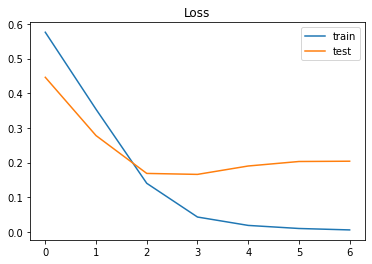

In [11]:
import matplotlib.pyplot as plt
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

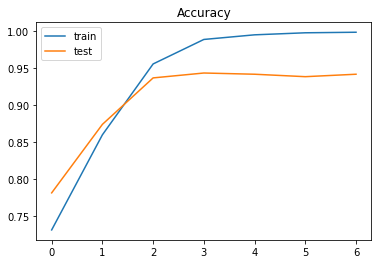

In [12]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

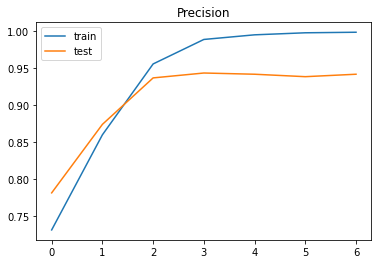

In [13]:
plt.title('Precision')
plt.plot(history.history['precision'], label='train')
plt.plot(history.history['val_precision'], label='test')
plt.legend()
plt.show();

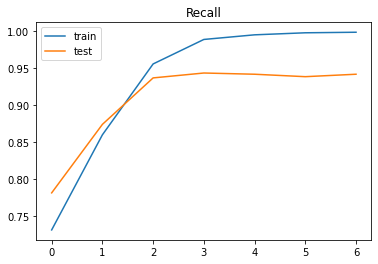

In [14]:
plt.title('Recall')
plt.plot(history.history['recall'], label='train')
plt.plot(history.history['val_recall'], label='test')
plt.legend()
plt.show();

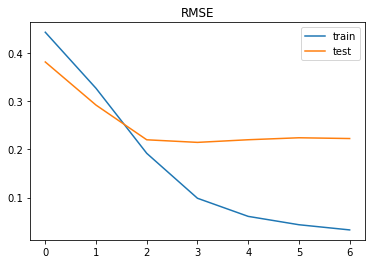

In [15]:
plt.title('RMSE')
plt.plot(history.history['rmse'], label='train')
plt.plot(history.history['val_rmse'], label='test')
plt.legend()
plt.show();

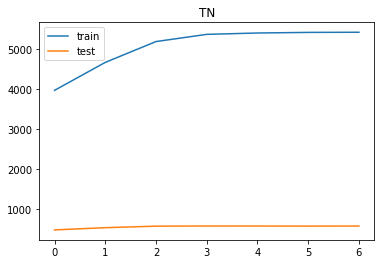

In [16]:
plt.title('TN')
plt.plot(history.history['TN'], label='train')
plt.plot(history.history['val_TN'], label='test')
plt.legend()
plt.show();

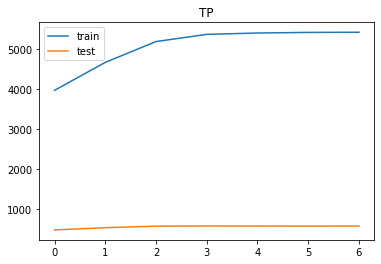

In [17]:
plt.title('TP')
plt.plot(history.history['TP'], label='train')
plt.plot(history.history['val_TP'], label='test')
plt.legend()
plt.show();

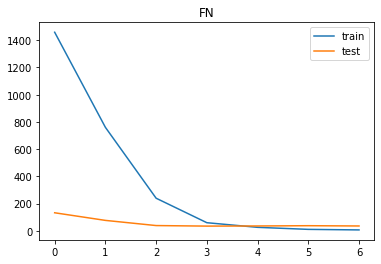

In [18]:
plt.title('FN')
plt.plot(history.history['FN'], label='train')
plt.plot(history.history['val_FN'], label='test')
plt.legend()
plt.show();

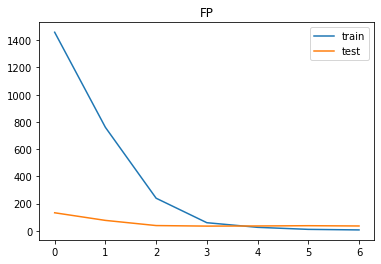

In [19]:
plt.title('FP')
plt.plot(history.history['FP'], label='train')
plt.plot(history.history['val_FP'], label='test')
plt.legend()
plt.show();

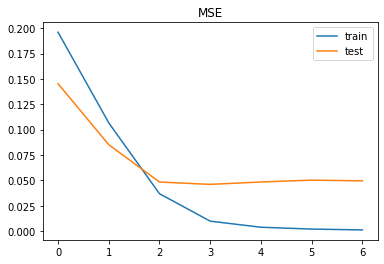

In [20]:
plt.title('MSE')
plt.plot(history.history['mse'], label='train')
plt.plot(history.history['val_mse'], label='test')
plt.legend()
plt.show();

In [21]:
val = validate[['cleanedText','result']].dropna()
X1 = tokenizer.texts_to_sequences(val['cleanedText'].values)
X1 = pad_sequences(X1, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X1.shape)
Y1 = pd.get_dummies(val['result']).values
print('Shape of label tensor:', Y1.shape)

Shape of data tensor: (498, 250)
Shape of label tensor: (498, 2)


In [26]:
accr = model.evaluate(X1,Y1)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

16/16 [==============================] - 1s 83ms/step - loss: 0.8772 - accuracy: 0.7791 - precision: 0.7791 - recall: 0.7791 - rmse: 0.4314 - TN: 388.0000 - TP: 388.0000 - FN: 110.0000 - FP: 110.0000 - mse: 0.1861
Test set
  Loss: 0.877
  Accuracy: 0.779


In [27]:
!pip install pyspellchecker

In [28]:
import re
from spellchecker import SpellChecker
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')

import spacy
#loading the english language small model of spacy
en = spacy.load('en_core_web_sm')
sw_spacy = en.Defaults.stop_words

def clean_text(text):
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
    text = text.replace('x', '')
    words = [word for word in text.split() if word.lower() not in sw_spacy]
    text = " ".join(words)
    return text

def fuzzyLogic(text):
  spell = SpellChecker()
  text = ' '.join([spell.correction(word) for word in text.split()])
  return text

def isDepressing(text):
  text = fuzzyLogic(text)
  lst = {'body':[text]}
  # Calling DataFrame constructor on list  
  dframe = pd.DataFrame(lst) 
  dframe = dframe['body'].apply(clean_text)
  dframe = dframe.str.replace('\d+', '')
  X1 = tokenizer.texts_to_sequences(dframe.values)
  X1 = pad_sequences(X1, maxlen=MAX_SEQUENCE_LENGTH)
  print('Shape of data tensor:', X1.shape)
  a = model.predict(X1)
  print(a)
  if(a[0][0] > a[0][1]):
    return 0
  return 1

In [33]:
isDepressing("i get depressing thoughts every day. i plan on committing suicide")

Shape of data tensor: (1, 250)
[[0.00859727 0.9914027 ]]


1

In [35]:
model.save('FinalModel.h5',save_format='h5')

In [36]:
!pip install pyyaml h5py  # Required to save models in HDF5 format

In [37]:
import os

import tensorflow as tf
from tensorflow import keras

print(tf.version.VERSION)

2.6.0


In [38]:
model.save('saved_model/my_model') 

INFO:tensorflow:Assets written to: saved_model/my_model/assets


In [39]:
!zip -r /content/file.zip /content/saved_model

  adding: content/saved_model/ (stored 0%)
  adding: content/saved_model/my_model/ (stored 0%)
  adding: content/saved_model/my_model/saved_model.pb (deflated 89%)
  adding: content/saved_model/my_model/assets/ (stored 0%)
  adding: content/saved_model/my_model/keras_metadata.pb (deflated 87%)
  adding: content/saved_model/my_model/variables/ (stored 0%)
  adding: content/saved_model/my_model/variables/variables.index (deflated 65%)
  adding: content/saved_model/my_model/variables/variables.data-00000-of-00001 (deflated 47%)


In [40]:
from google.colab import files
files.download("/content/file.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>